<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/Oximetry_Data_rep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/Oximetry_Data.csv'

In [4]:
df = pd.read_csv(FILE_LOCATION)
df
#df.head()

,no,obs,rep,CO,PULSE,obs_new,CO_new,PULSE_new,CO_1,PULSE_1,CO_2,PULSE_2,CO_3,PULSE_3
0,1,1,1,0.5497,0.3889,1.0,0.5299,0.4104,0.5497,0.3889,0.5102,0.4102,0.5297,0.4320
1,2,1,2,0.5102,0.4102,2.0,0.3314,0.3208,0.3414,0.3274,0.3194,0.3076,0.3334,0.3274
2,3,1,3,0.5297,0.4320,3.0,0.6372,0.5694,0.6856,0.6585,0.6048,0.5248,0.6213,0.5248
3,4,2,1,0.3414,0.3274,4.0,0.2732,0.2500,0.2181,-0.1224,0.2842,0.3475,0.3174,0.5248
4,5,2,2,0.3194,0.3076,5.0,0.4837,0.4127,0.4959,0.5006,0.4475,0.4102,0.5078,0.3274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,179,60,2,0.7042,0.5248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,180,60,3,0.7432,0.6021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,181,61,1,0.4982,0.4102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,182,61,2,0.5174,0.3680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
table = df[['obs_new', 'CO_1', 'PULSE_1']]
table

,obs_new,CO_1,PULSE_1
0,1.0,0.5497,0.3889
1,2.0,0.3414,0.3274
2,3.0,0.6856,0.6585
3,4.0,0.2181,-0.1224
4,5.0,0.4959,0.5006
...,...,...,...
178,NaN,NaN,NaN
179,NaN,NaN,NaN
180,NaN,NaN,NaN
181,NaN,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['obs_new', 'CO_1', 'PULSE_1'])
table1

,obs_new,CO_1,PULSE_1
0,1.0,0.5497,0.3889
1,2.0,0.3414,0.3274
2,3.0,0.6856,0.6585
3,4.0,0.2181,-0.1224
4,5.0,0.4959,0.5006
...,...,...,...
56,57.0,1.1579,1.0607
57,58.0,0.8778,0.7202
58,59.0,0.9260,1.1950
59,60.0,0.8333,0.5754


In [7]:
table1.mean()

obs_new    31.000000
CO_1        0.534864
PULSE_1     0.452757
dtype: float64

In [8]:
x = table1[['PULSE_1']]
y = table1['CO_1']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

table_data_new = pd.DataFrame({ 'x1'    : table1['PULSE_1'],
                                'y'     : table1['CO_1'],
                                'y_hat' : df['Predicted']})
table_data_new['e'] = table_data_new['y'] - table_data_new['y_hat']
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,y,y_hat,e
0,0.3889,0.5497,0.479894,0.069806
1,0.3274,0.3414,0.426954,-0.085554
2,0.6585,0.6856,0.711971,-0.026371
3,-0.1224,0.2181,0.039757,0.178343
4,0.5006,0.4959,0.576048,-0.080148
...,...,...,...,...
56,1.0607,1.1579,1.058194,0.099706
57,0.7202,0.8778,0.765084,0.112716
58,1.1950,0.9260,1.173802,-0.247802
59,0.5754,0.8333,0.640437,0.192863


In [9]:
table_data_new.to_csv('Oximetry_Data.csv')
files.download('Oximetry_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

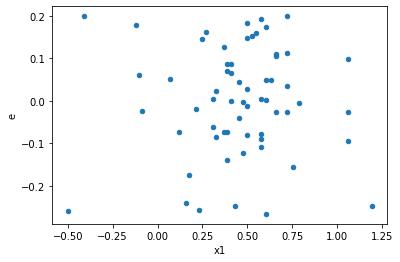

In [10]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')

In [11]:
# เรียง data จากน้อยไปมากตาม y_hat
new_table_sort = table_data_new.sort_values('y_hat')
new_table_sort.reset_index(inplace=True)
new_table_sort.drop(['index'], axis=1, inplace=True)
new_table_sort

,x1,y,y_hat,e
0,-0.5006,-0.5446,-0.285806,-0.258794
1,-0.4102,-0.0087,-0.207988,0.199288
2,-0.1224,0.2181,0.039757,0.178343
3,-0.1047,0.1153,0.054993,0.060307
4,-0.0872,0.0452,0.070057,-0.024857
...,...,...,...,...
56,0.7884,0.8179,0.823792,-0.005892
57,1.0607,1.0320,1.058194,-0.026194
58,1.0607,0.9640,1.058194,-0.094194
59,1.0607,1.1579,1.058194,0.099706


In [12]:
# กำหนด % การแบ่งข้อมูล
percent_data = 0.4

In [13]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
table_new1

,x1,y,y_hat,e
0,-0.5006,-0.5446,-0.285806,-0.258794
1,-0.4102,-0.0087,-0.207988,0.199288
2,-0.1224,0.2181,0.039757,0.178343
3,-0.1047,0.1153,0.054993,0.060307
4,-0.0872,0.0452,0.070057,-0.024857
5,0.0696,0.2574,0.205034,0.052366
6,0.1224,0.1761,0.250485,-0.074385
7,0.1581,0.0400,0.281217,-0.241217
8,0.1761,0.1224,0.296712,-0.174312
9,0.2126,0.3095,0.328132,-0.018632


In [14]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
y = table_new1['y']
x = table_new1[['x1']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 1
DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
DF1

23.0

In [16]:
SSE1

0.4181051667785416

In [17]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
table_new2

,x1,y,y_hat,e
36,0.5248,0.7499,0.596880,0.153020
37,0.5497,0.7776,0.618314,0.159286
38,0.5754,0.5497,0.640437,-0.090737
39,0.5754,0.5624,0.640437,-0.078037
40,0.5754,0.8333,0.640437,0.192863
41,0.5754,0.5322,0.640437,-0.108237
42,0.5754,0.6440,0.640437,0.003563
43,0.6021,0.6645,0.663421,0.001079
44,0.6021,0.7137,0.663421,0.050279
45,0.6021,0.3973,0.663421,-0.266121


In [18]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
y = table_new2['y']
x = table_new2[['x1']]

# add constant to predictor variable
x = sm.add_constant(x)
# fit linear regression model
model2 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 2
DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
DF2

24.0

In [20]:
SSE2

0.35602243455372923

In [21]:
# ค่าสถิติทดสอบ
GQ_test = (SSE2/DF2) / (SSE1/DF1)
GQ_test

0.8160343223599565

In [22]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test, DF2, DF1)

In [23]:
two_tailed

1.3760917886530035

In [24]:
p_greater*2

0.6239082113469964

In [25]:
p_less

0.6880458943265018

###### The two-tailed p-value equals: 0.6239

###### p( x < 0.816 ) = 0.312
###### p( x > 0.816 ) = 0.688
###### p( x < 0.816 ) + p( x >1.2288) = 0.6239
###### Since p-value > α, H0 is not rejected. (0.6239 > 0.05)

https://www.statskingdom.com/p_value.html

In [27]:
Significance = 0.05
if (p_greater*2) < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=1 : Homoscedasticity
